<a href="https://colab.research.google.com/github/jordan-dsouza/Projects/blob/main/MarketingCampaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import zipfile
zip_file_path = '/content/1689942193_marketing_data.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/marketing')

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from scipy.stats import ttest_ind, chi2_contingency

In [32]:
df = pd.read_csv("/content/marketing/marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [33]:
 df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [34]:
df.rename(columns = {" Income ":"Income"}, inplace = True)

##Remove null values:

In [35]:
df["Income"] = df["Income"].str[1:].str.replace(",", "").astype(float)
df["Income"] = df["Income"].fillna(df.groupby(["Education", "Marital_Status"])["Income"].transform("mean"))
df["Income"].isnull().sum()

0

##Create variables to populate the total number of children, age, and total spending:

In [36]:
#Calculate age:
current_year = datetime.datetime.now().year
df["Age"] = current_year - df["Year_Birth"]

#Total number of children:
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]
#Total spending:
spending_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
                    "MntSweetProducts", "MntGoldProds"]
df["Total_Spending"] = df[spending_columns].sum(axis=1)

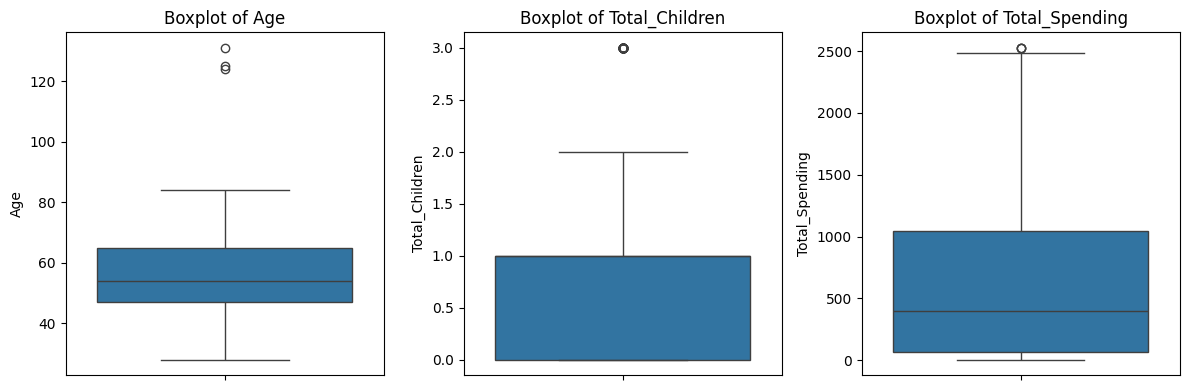

In [37]:
columns_of_interest = ["Age", "Total_Children", "Total_Spending"]

#Box plot:
plt.figure(figsize=(12, 4))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(1, len(columns_of_interest), i)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

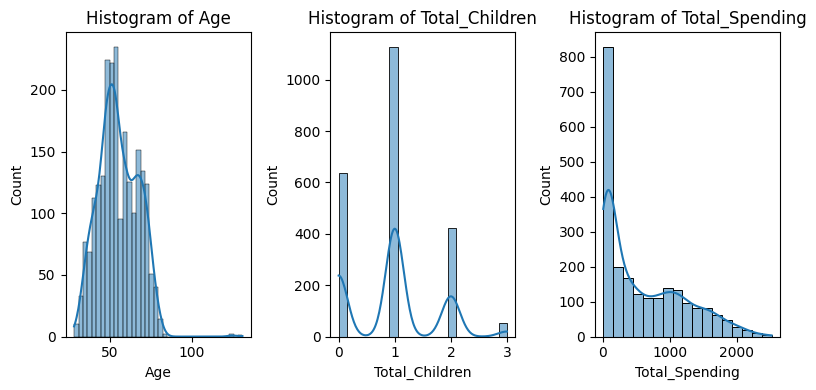

In [38]:
#Histogram:
plt.figure(figsize=(8, 4))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(1, len(columns_of_interest), i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram of {column}")
plt.tight_layout()
plt.show()

In [39]:
for column in columns_of_interest:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#Updated df without outliers:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_Children,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,0,1,0,SP,54,0,1190
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,1,1,0,CA,63,0,577
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,0,US,66,1,251
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,0,AUS,57,2,11
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,0,0,0,1,0,SP,35,1,91


<ipython-input-40-b8434d465523>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)


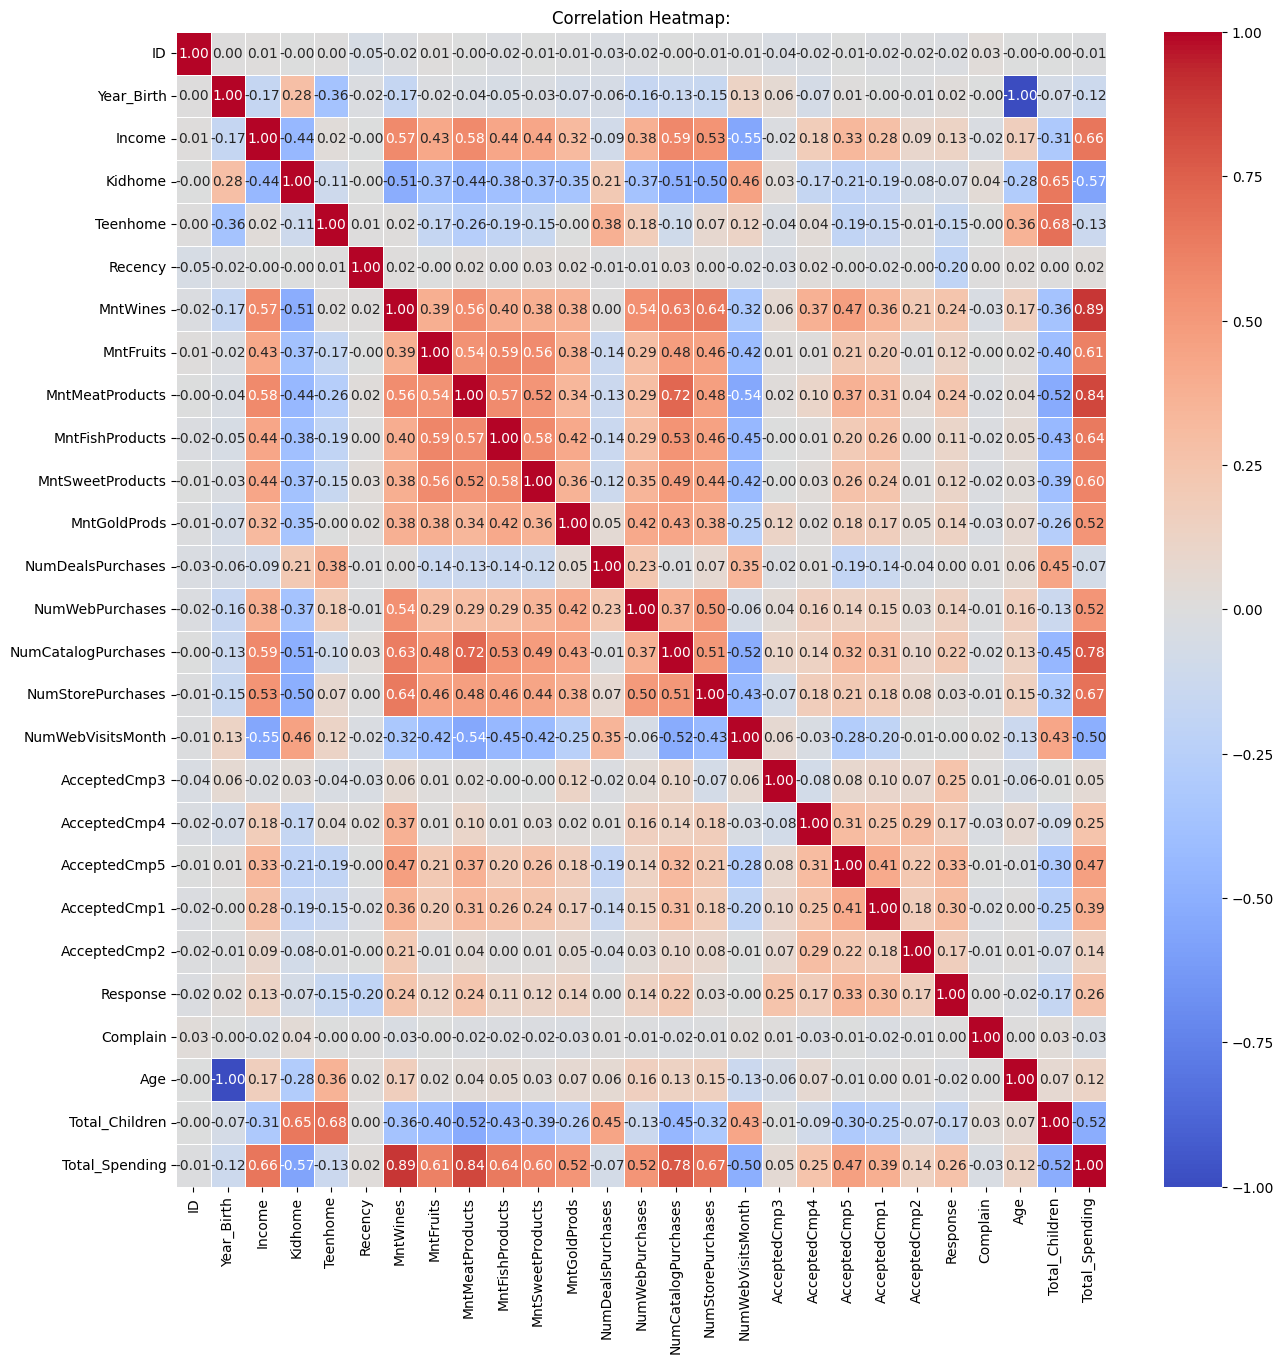

In [40]:
#Heatmap:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Correlation Heatmap:")
plt.show()

##Encoding (Ordinal and One-Hot):

In [42]:
df1=df.copy()
#Ordinal and nominal categorical columns:
ordinal_cols = ["Education", "Marital_Status"]
nominal_cols = ["Dt_Customer", "Country"]

#Ordinal encoding:
ordinal_encoder = OrdinalEncoder()
df1[ordinal_cols] = ordinal_encoder.fit_transform(df1[ordinal_cols])

#One-hot encoding:
df1 = pd.get_dummies(df1, columns=nominal_cols)
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Dt_Customer_9/9/12,Dt_Customer_9/9/13,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,2.0,2.0,84835.0,0,0,0,189,104,...,0,0,0,0,0,0,0,0,1,0
1,1,1961,2.0,4.0,57091.0,0,0,0,464,5,...,0,0,0,1,0,0,0,0,0,0
2,10476,1958,2.0,3.0,67267.0,0,1,0,134,11,...,0,0,0,0,0,0,0,0,0,1
3,1386,1967,2.0,5.0,32474.0,1,1,0,10,0,...,0,0,1,0,0,0,0,0,0,0
4,5371,1989,2.0,4.0,21474.0,1,0,0,6,16,...,0,0,0,0,0,0,0,0,1,0


##Test Hypothesis:

Test the following hypotheses:
1. Older people are not as tech-savvy and probably prefer shopping in-store.
2. Customers with kids probably have less time to visit a store and would
prefer to shop online.
3. Other distribution channels may cannibalize sales at the store.
4. Does the US fare significantly better than the rest of the world in terms of
total purchases?
**True if the null hypothesis should be rejected.**<br>
**False if the null hypothesis should not be rejected.**

In [64]:
alpha = 0.05
def reject_nullhyp(p_value, alpha):
  if p_value<=alpha:
    print("Reject the null hypothesis.")
  else:
    print("Do not reject null hypothesis.")

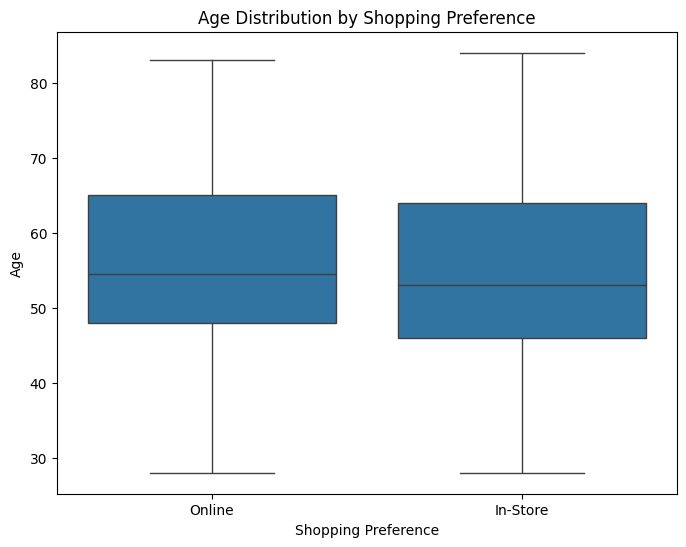

Hypothesis 1 - Older people prefer shopping in-store:
p-value: 0.0447189575275921


Reject the null hypothesis.


In [65]:
#Hypothesis 1: Older people prefer shopping in-store:

plt.figure(figsize=(8, 6))
sns.boxplot(x="Shopping_Preference", y="Age", data=df)
plt.title("Age Distribution by Shopping Preference")
plt.xlabel("Shopping Preference")
plt.ylabel("Age")
plt.xticks([0, 1], ["Online", "In-Store"])
plt.show()

df["Shopping_Preference"] = df["NumStorePurchases"] > df["NumWebPurchases"]
in_store_age = df[df["Shopping_Preference"]]["Age"]
online_shopping_age = df[~df["Shopping_Preference"]]["Age"]
t_stat1, p_value1 = ttest_ind(in_store_age, online_shopping_age)
print("Hypothesis 1 - Older people prefer shopping in-store:")
print("p-value:", p_value1)
print("\n")
reject_nullhyp(p_value1, alpha)

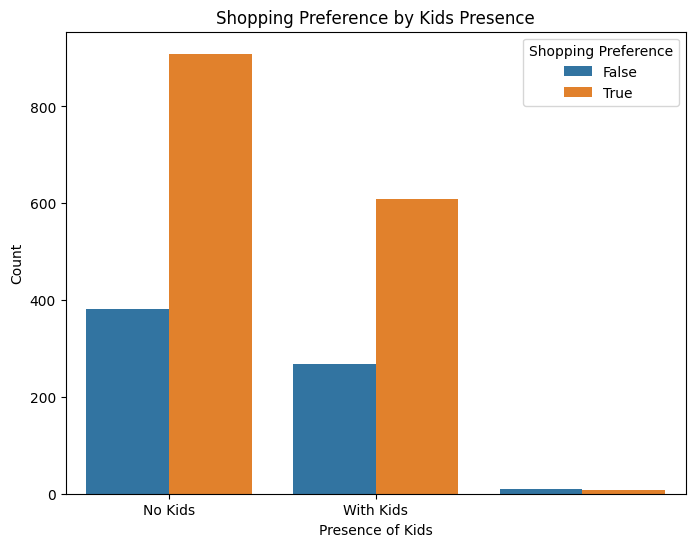

Hypothesis 2 - Customers with kids prefer shopping online:
p-value: 0.031791073167880435


Reject the null hypothesis.


In [66]:
#Hypothesis 2: Customers with kids prefer shopping online:

#Bar plot:
plt.figure(figsize=(8, 6))
sns.countplot(x="Kidhome", hue="Shopping_Preference", data=df)
plt.title("Shopping Preference by Kids Presence")
plt.xlabel("Presence of Kids")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Kids", "With Kids"])
plt.legend(title="Shopping Preference", loc="upper right")
plt.show()


contingency_table = pd.crosstab(df["Kidhome"], df["Shopping_Preference"])
chi2, p_value2, _, _ = chi2_contingency(contingency_table)
print("Hypothesis 2 - Customers with kids prefer shopping online:")
print("p-value:", p_value2)
print("\n")
reject_nullhyp(p_value2, alpha)

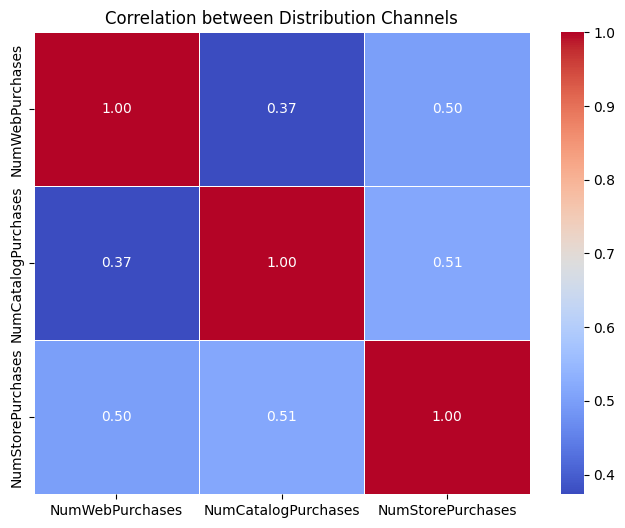

Hypothesis 3 - Correlation between distribution channels:
                     NumWebPurchases  NumCatalogPurchases  NumStorePurchases
NumWebPurchases             1.000000             0.373295           0.499997
NumCatalogPurchases         0.373295             1.000000           0.513991
NumStorePurchases           0.499997             0.513991           1.000000


In [57]:
#Hypothesis 3: Correlation between distribution channels:

channels = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
sales_corr = df[channels].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(sales_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Distribution Channels")
plt.show()

print("Hypothesis 3 - Correlation between distribution channels:")
print(sales_corr)

Reject null hypothesis.

In [67]:
#Hypothesis 4: Comparison of total purchases between the US and other countries using T-test:

us_purchases = df[df["Country"] == "US"]["NumWebPurchases"].sum() + df[df["Country"] == "US"]["NumCatalogPurchases"].sum() + df[df["Country"] == "US"]["NumStorePurchases"].sum()
non_us_purchases = df[df["Country"] != "US"]["NumWebPurchases"].sum() + df[df["Country"] != "US"]["NumCatalogPurchases"].sum() + df[df["Country"] != "US"]["NumStorePurchases"].sum()
t_stat2, p_value3 = ttest_ind(us_purchases, non_us_purchases)
print("Hypothesis 4 - Comparison of total purchases between the US and other countries:")
print("p-value:", p_value3)

Hypothesis 4 - Comparison of total purchases between the US and other countries:
p-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


Hypothesis 4 contains independent groups (US and Non-US) which are non normal and skewed negatively. So I am using the Mann-Whitney U test which is a non-parametric test.

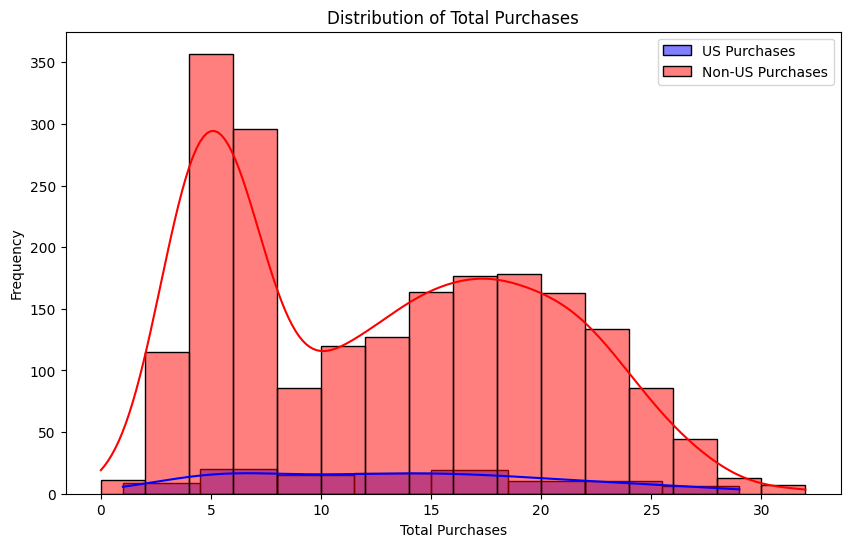

Hypothesis 4 - Comparison of total purchases between the US and other countries (Mann-Whitney U test):
p-value: 0.18613456730569378


Do not reject null hypothesis.


In [68]:
from scipy.stats import mannwhitneyu

#Total purchases for US and non-US countries:
us_purchases = df[df["Country"] == "US"]["NumWebPurchases"] + df[df["Country"] == "US"]["NumCatalogPurchases"] + df[df["Country"] == "US"]["NumStorePurchases"]
non_us_purchases = df[df["Country"] != "US"]["NumWebPurchases"] + df[df["Country"] != "US"]["NumCatalogPurchases"] + df[df["Country"] != "US"]["NumStorePurchases"]

#Plot distributions:
plt.figure(figsize=(10, 6))
sns.histplot(us_purchases, label="US Purchases", color="blue", kde=True)
sns.histplot(non_us_purchases, label="Non-US Purchases", color="red", kde=True)
plt.title("Distribution of Total Purchases")
plt.xlabel("Total Purchases")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#Mann-Whitney U test:
statistic, p_value4 = mannwhitneyu(us_purchases, non_us_purchases)
print("Hypothesis 4 - Comparison of total purchases between the US and other countries (Mann-Whitney U test):")
print("p-value:", p_value4)
print("\n")
reject_nullhyp(p_value4, alpha)

##Visualization:

1. Which products are performing the best, and which are performing the
least in terms of revenue?

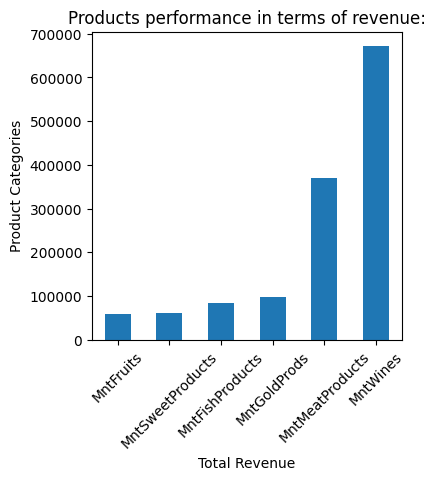

In [73]:
prod_revenue = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum()

plt.figure(figsize=(4,4))
prod_revenue.sort_values().plot(kind="bar")
plt.title("Products performance in terms of revenue:")
plt.xlabel("Total Revenue")
plt.ylabel("Product Categories")
plt.xticks(rotation=45)
plt.show()

2. Is there any pattern between the age of customers and the last campaign
acceptance rate?

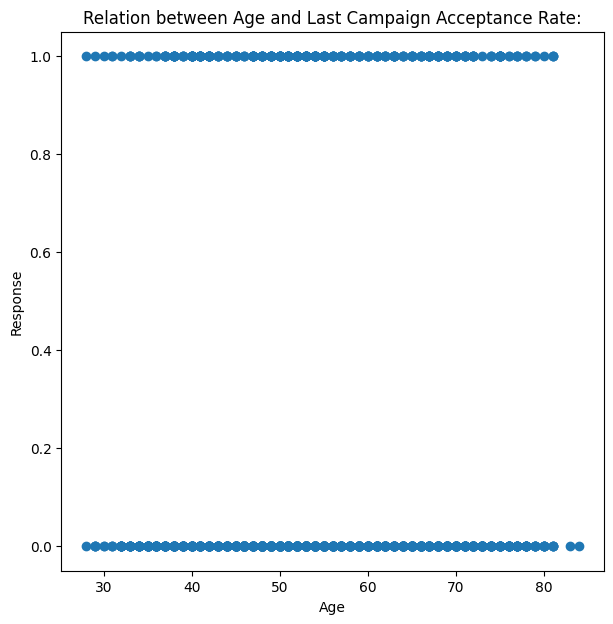

In [74]:
plt.figure(figsize=(7,7))
plt.scatter(df["Age"], df["Response"])
plt.title("Relation between Age and Last Campaign Acceptance Rate:")
plt.xlabel("Age")
plt.ylabel("Response")
plt.show()

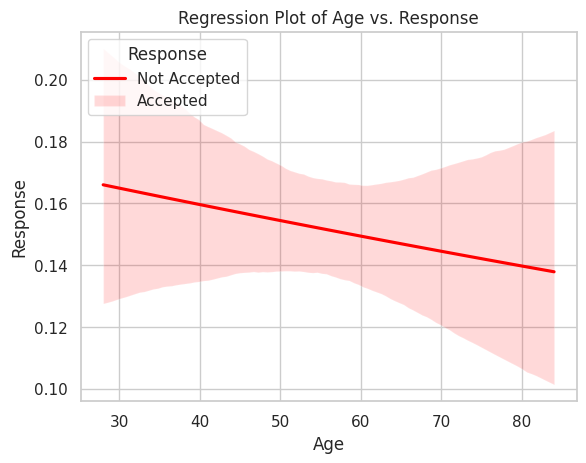

In [92]:
sns.set(style="whitegrid")
sns.regplot(x="Age", y="Response", data=df, logistic=True, scatter=False, color="red")
plt.title("Regression Plot of Age vs. Response")
plt.xlabel("Age")
plt.ylabel("Response")
plt.legend(title="Response", loc="upper left", labels=["Not Accepted", "Accepted"])
plt.show()

3. Which country has the greatest number of customers who accepted the
last campaign?

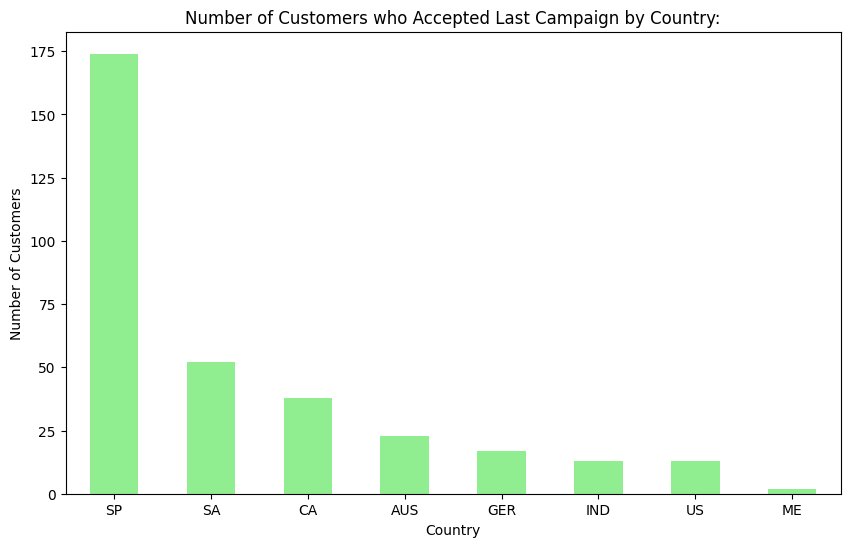

In [81]:
campaign_acceptance_by_country = df[df["Response"] == 1]["Country"].value_counts()

plt.figure(figsize=(10, 6))
campaign_acceptance_by_country.plot(kind="bar", color="lightgreen")
plt.title("Number of Customers who Accepted Last Campaign by Country:")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

4. Do you see any pattern in the no. of children at home and total spend?

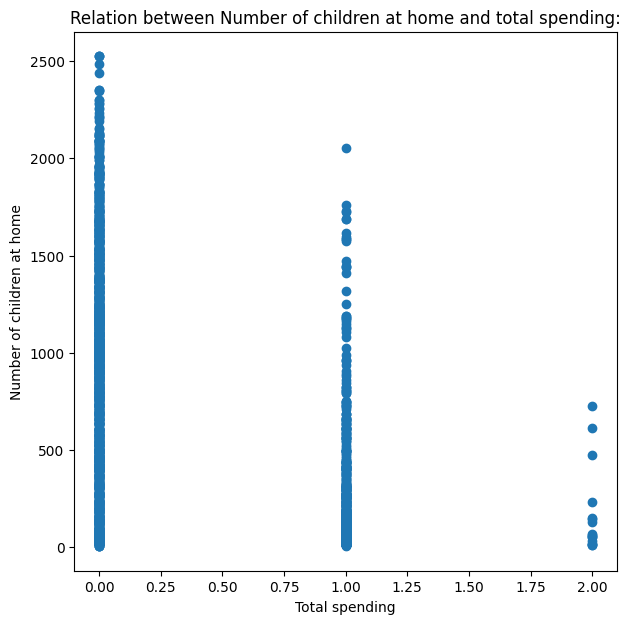

In [84]:
plt.figure(figsize=(7,7))
plt.scatter(df["Kidhome"], df["Total_Spending"])
plt.title("Relation between Number of children at home and total spending:")
plt.xlabel("Total spending")
plt.ylabel("Number of children at home")
plt.show()

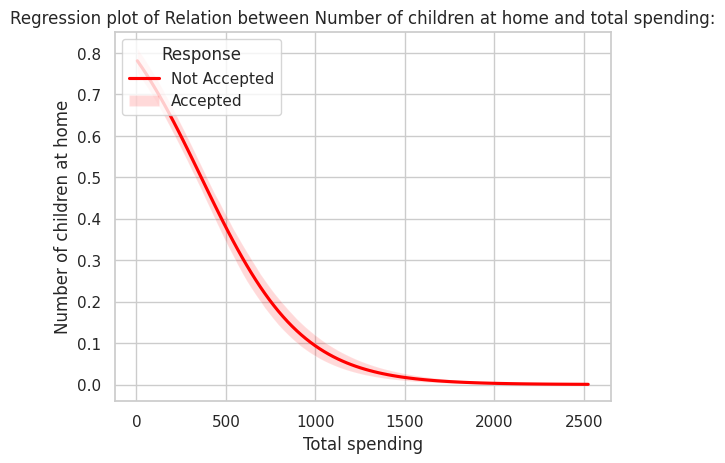

In [91]:
sns.set(style="whitegrid")
sns.regplot(x="Total_Spending", y="Kidhome", data=df, logistic=True, scatter=False, color="red")
plt.legend(title="Response", loc="upper left", labels=["Not Accepted", "Accepted"])
plt.title("Regression plot of Relation between Number of children at home and total spending:")
plt.xlabel("Total spending")
plt.ylabel("Number of children at home")
plt.show()

5. Education background of the customers who complained in the last 2
years.

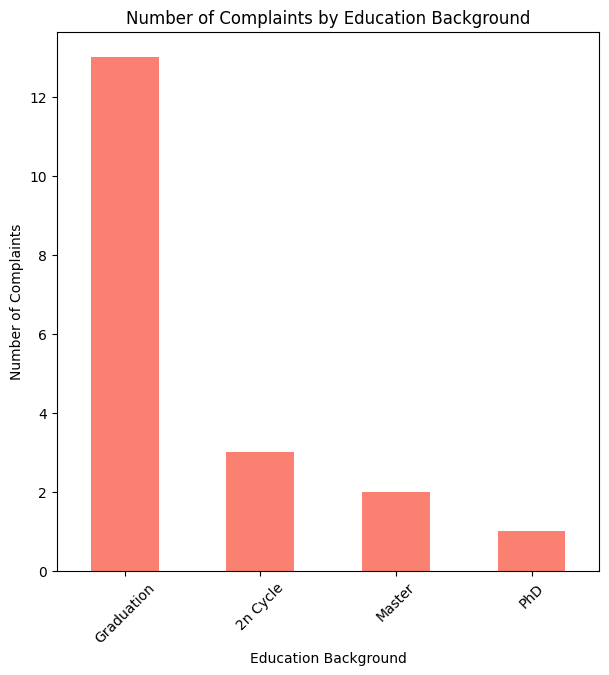

In [86]:
complaints_by_education = df[df["Complain"] == 1]["Education"].value_counts()

plt.figure(figsize=(7,7))
complaints_by_education.plot(kind="bar", color="salmon")
plt.title("Number of Complaints by Education Background")
plt.xlabel("Education Background")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.show()